<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/Simply_Write/Validation(%EA%B2%80%EC%A6%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Training Dataset"**를
# **"Train Data(학습/훈련용 데이터)"**와 **"Validation Data(검증 데이터)"**로 나누어서 학습하고 검증한다.
## 보통 7:3 or 8:2로 나눈다.

## 학습 및 검증을 할떄 Train Data와 Validation Data가 몰려있어야한다.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [11]:
# Mnist 데이터 세트
mnist = tf.keras.datasets.mnist
(X, y), (x_test, y_tset) = mnist.load_data()

In [12]:
# 모델 만들기 (다중분류)
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

In [13]:
# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

## 검증데이터 나누는 방법 1

In [14]:
history = model.fit(X, y, validation_split = 0.2, epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 4.3706 - accuracy: 0.7702 - val_loss: 0.7150 - val_accuracy: 0.8400
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.8575 - val_loss: 0.4906 - val_accuracy: 0.8868
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8961 - val_loss: 0.3713 - val_accuracy: 0.9084
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3185 - accuracy: 0.9151 - val_loss: 0.3594 - val_accuracy: 0.9071
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.9220 - val_loss: 0.3324 - val_accuracy: 0.9232


Text(0, 0.5, 'accuarcy')

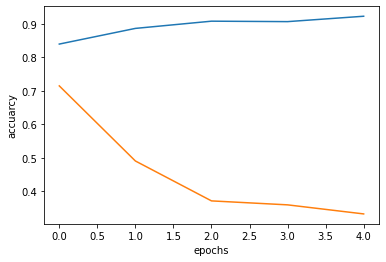

In [28]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("accuarcy")

## 검증데이터 나누는 방법 2

In [29]:
# Mnist 데이터 세트
mnist = tf.keras.datasets.mnist
(X, y), (x_test, y_tset) = mnist.load_data()

In [30]:
# train_test_split 활용
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# 시퀀셜 모델 만들기
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(64, activation = "relu"),
                    Dense(10, activation = "softmax")
])

# 모델 컴파일
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 훈련(학습) validation_data
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5, batch_size = 64)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 3.7466 - accuracy: 0.7725 - val_loss: 0.7498 - val_accuracy: 0.8179
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.5917 - accuracy: 0.8565 - val_loss: 0.5335 - val_accuracy: 0.8873
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8973 - val_loss: 0.4608 - val_accuracy: 0.8997
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3173 - accuracy: 0.9161 - val_loss: 0.3733 - val_accuracy: 0.9178
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2731 - accuracy: 0.9278 - val_loss: 0.3420 - val_accuracy: 0.9212


Text(0, 0.5, 'accuarcy')

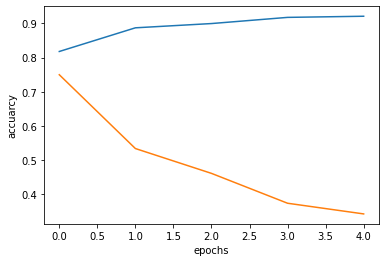

In [31]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("accuarcy")